In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
#from statsmodels.compat import lzip 
import statsmodels.stats.api as sms

In [48]:
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'
df = pd.read_csv(path + 'housing.csv', sep =',' , encoding = 'iso-8859-1')
df.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [49]:
regressao_linear = smf.ols('MEDV ~ RM + LSTAT + PTRATIO', data = df).fit()

In [50]:
residuos = regressao_linear.resid

In [51]:
#TESTE DE NORMALIDADE DOS RESIDUOS
#Ho - Distribuição Normal: p > 0,05
#Ha - Distribuição não Normal: p <= 0,05 (Representa inconsistência do modelo)

In [52]:
estatistica, p = stats.shapiro(residuos)
print(f'Estatística de teste: {estatistica}.')
print(f'p-valor: {p}.')

Estatística de teste: 0.9633497595787048.
p-valor: 1.0876398670589538e-09.


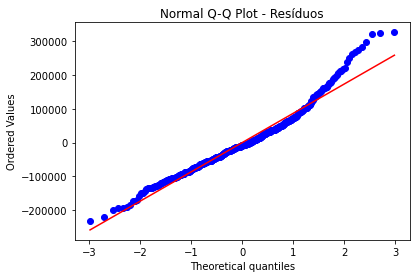

In [53]:
#Pontos azuls devem estar alinhados à reta vermelha
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

In [54]:
#ANÁLISE DE HOMOCEDASTICIDADE (resíduos com varição constante) 
#Heterodasticidade: Dispersão com relação à linha central lanranja - Inconsistência do modelo 

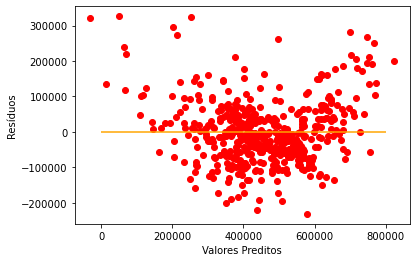

In [55]:
plt.scatter(y=residuos, x = regressao_linear.predict(), color = 'red')
plt.hlines(y = 0, xmin = 0, xmax = 800000, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [56]:
#TESTE DE BREUSCH-PAGAN (HOMOCEDASTICIDADE OU HETERODASTICIDADE)
#Ho -> Homocedasticidade: p > 0,05
#Ha -> Não existe Homocedasticidade: p <= 0,05

In [57]:
estatistica_bp, p_pb, f_bp, fp = sms.het_breuschpagan(regressao_linear.resid, regressao_linear.model.exog)
print(f'Estatística de teste: {estatistica_bp}.')
print(f'p-valor: {p_pb}.')
print(f'f-valor: {f_bp}.')
print(f'f_p-valor: {f_bp}.')


Estatística de teste: 14.86651774115751.
p-valor: 0.0019343456956174363.
f-valor: 5.069079611723565.
f_p-valor: 5.069079611723565.


In [58]:
#OUTLIERS DOS RESIDUOS (DEVE ESTAR ENTRE -3 E 3)

In [59]:
outliers = regressao_linear.outlier_test()

In [60]:
outliers.max() #Problema no outlier (3.88)

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [61]:
outliers.min()

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

In [62]:
#AUSÊNCIA DE MULTICOLINEARIDADE
#Considera multicolinearidade quando r > 0,9

In [63]:
variaveis = df[['RM', 'LSTAT', 'PTRATIO']]
variaveis.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [64]:
correlacoes = variaveis.corr(method = 'pearson')
correlacoes

,RM,LSTAT,PTRATIO
RM,1.000000,-0.612033,-0.304559
LSTAT,-0.612033,1.000000,0.360445
PTRATIO,-0.304559,0.360445,1.000000


In [65]:
#Resumo

#Estatística t (P>|t|)
#Ho -> Coeficiente igual a zero e p > 0,05 (coeficiente não validado)
#Ha -> Coeficiente diferente de zero e p <= 0,05 (coeficiente validado) *esse caso*

#R^2 ajustado = 0,716

print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          9.96e-133
Time:                        10:54:37   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

In [66]:
coefs = pd.DataFrame(regressao_linear.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  415464.396517
RM          86565.236133
LSTAT      -10849.340384
PTRATIO    -19492.115635


In [67]:
df['Previsao'] = regressao_linear.fittedvalues
df.head()

,RM,LSTAT,PTRATIO,MEDV,Previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313
2,7.185,4.03,17.8,728700.0,646753.118080
3,6.998,2.94,18.7,701400.0,624848.295870
4,7.147,5.33,18.7,760200.0,611816.592536


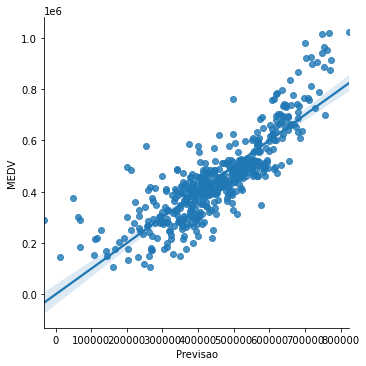

In [68]:
#Reta aproximando o valor real e a previsão
sb.lmplot(x = 'Previsao', y = 'MEDV', data=df)